# Precipitation Analysis Method: Looking at Snow Shadows and Weather Model Performance in the Uinta Basin

## Overview

This analysis looks at two main questions for our Uinta Basin winter ozone study: (1) Can we actually see a snow shadow effect in the data? and (2) How well does the RTMA weather model work in this area? We compared real precipitation measurements from weather stations with what the RTMA model predicted during a winter storm from December 28, 2024 to January 3, 2025.

## What We're Studying

**Our Main Questions:**

1. **Snow Shadow**: Is there really a snow shadow in the Uinta Basin? We should see less precipitation on the east side of the Wasatch Mountains compared to the west side.

2. **Model Performance**: How good is RTMA at predicting precipitation in this area? This matters because weather models are used for forecasting, and we want to know if we can trust them.

**Why This Matters**: Both questions help us understand winter ozone problems in the Uinta Basin. Snow patterns affect how cold air gets trapped and how ozone forms. If weather models don't work well here, that could be a problem for predicting air quality.

## The Data Sources

### Real Weather Stations
- **Source**: Weather stations across Utah using SynopticPy to get the data
- **What it measures**: Actual hourly precipitation from rain gauges and snow sensors
- **Time period**: December 28, 2024 to January 3, 2025
- **Why it's important**: This is what actually happened - the "ground truth"

### RTMA Weather Model
- **Source**: RTMA (Real-Time Mesoscale Analysis) using the Herbie library
- **What it provides**: Computer model predictions of precipitation on a 2.5km grid
- **Resolution**: Hourly predictions that we matched to station locations
- **Why we're testing it**: RTMA is used for weather forecasting, so we want to know how accurate it is in our study area

## About RTMA

**What is RTMA?**
RTMA is a weather analysis system that runs every hour to provide current weather conditions across the United States. It combines computer model forecasts with real observations from weather stations to create maps of temperature, precipitation, wind, and other weather variables.

**What products are available?**
RTMA produces several weather variables, but the most useful ones for our study are:
- **Precipitation analysis** - hourly amounts of rain and snow
- **Temperature and dewpoint** - surface conditions that affect snow accumulation
- **Wind analysis** - important for understanding storm patterns
- **Surface pressure** - helps understand weather patterns

For our snow shadow research, the precipitation analysis is the most important product.

**How is RTMA created?**
RTMA starts with forecasts from other weather models (like HRRR and NAM) and then adjusts these forecasts using real observations from weather stations, airports, and other sensors. It uses a mathematical technique called "2-dimensional variational analysis" to blend the model forecasts with the observations and create the best estimate of current conditions on a 2.5km grid.

**What are the pros and cons?**
*Pros:*
- **Real-time availability**: Updates every hour, so it's current
- **High resolution**: 2.5km grid provides detailed spatial information
- **Combines multiple data sources**: Uses both models and observations
- **Widely used**: Standard product for weather forecasting

*Cons:*
- **Complex terrain challenges**: May struggle in mountainous areas like ours
- **Limited by observations**: Accuracy depends on having good weather station coverage
- **Model limitations**: Still relies on underlying weather model forecasts that may have biases
- **Short latency**: 55-minute delay means some observations might be missed

## How We Organized the Weather Stations

We divided weather stations into four groups based on where they sit relative to the mountains. This helps us see if there's really a snow shadow pattern:

### 1. Windward Stations (West Side)
- **Location**: West side of the Wasatch Mountains where storms hit first
- **Stations**: KSLC (Salt Lake City), KPVU (Provo), KSVR (South Valley)
- **What we expect**: More precipitation because air gets pushed up and cooled

### 2. Mountain Stations (High Up)
- **Location**: High up in the Wasatch Mountains
- **Stations**: CLN (Alta Collins), ATB (Alta Base), SPC (Snowbird)
- **What we expect**: Most precipitation because of the altitude and mountain effects

### 3. Transition Stations (Middle)
- **Location**: Eastern slopes heading toward the Uinta Basin
- **Stations**: HANU1, BSHU1, TADU1
- **What we expect**: Less precipitation as air starts descending

### 4. Leeward Stations (East Side - Uinta Basin)
- **Location**: Eastern Utah in the Uinta Basin
- **Stations**: LRFU1, A1388, KVEL (Vernal)
- **What we expect**: Least precipitation due to snow shadow effects

## The Method

### Why RTMA Evaluation Matters for Uinta Basin Research

RTMA is widely used for operational weather forecasting and provides meteorological inputs for air quality models. In the Uinta Basin, where winter ozone episodes depend on specific meteorological conditions (including snow cover, temperature inversions, and wind patterns), understanding RTMA's limitations is crucial for:

- **Operational air quality forecasting**: Poor precipitation forecasts could lead to incorrect snow depth predictions, affecting surface energy balance calculations
- **Research model validation**: Any ozone formation models using RTMA inputs need to account for systematic biases
- **Data sparse region**: The Uinta Basin has limited observational coverage, making model accuracy even more critical for filling data gaps

### Data Collection Process
1. **Gather station data**: Use the Synoptic API to download hourly precipitation measurements from all stations
2. **Retrieve model data**: Use Herbie to download RTMA precipitation grids for the same time period
3. **Extract model values**: For each station location, find the nearest model grid point and extract predicted precipitation
4. **Aggregate to daily totals**: Sum up hourly values to get daily precipitation amounts for both observed and modeled data

### Analysis Approach
1. **Snow shadow documentation**: Compare precipitation amounts across the terrain gradient to identify the expected west-east precipitation decrease characteristic of orographic precipitation shadows
2. **RTMA performance assessment**: Evaluate systematic biases and accuracy of RTMA precipitation forecasts across different terrain types in the Uinta Basin
3. **Terrain-dependent model evaluation**: Assess how RTMA performance varies from windward to leeward locations, identifying where the model struggles most
4. **Operational implications**: Document model limitations that could affect winter air quality forecasting and meteorological input reliability for ozone prediction systems

## Key Findings from This Run

### Windward Terrain
- **Observations**: Major precipitation events on Dec 28 (up to 41mm at KPVU) and Dec 29 (33mm at KSLC)
- **RTMA Performance**: Significantly underestimated precipitation amounts
- **Example bias**: KPVU showed 43.7mm observed vs 1.3mm modeled (42.3mm underestimate)

### Mountain Terrain
- **Observations**: High variability between stations; CLN (high elevation) recorded much more than ATB (lower elevation)
- **RTMA Performance**: Mixed results - sometimes overestimated when no precipitation occurred
- **Pattern**: Model showed precipitation when observations were zero, suggesting timing or spatial issues

### Transition and Leeward Terrain
- **Observations**: Generally low precipitation amounts, consistent with rain shadow effects
- **RTMA Performance**: Model predicted mostly zero precipitation, which matched observations fairly well
- **Note**: These areas saw limited precipitation during this particular storm period

## Technical Implementation

### Tools We Used
- **Python** for processing data and making calculations
- **SynopticPy** for downloading weather station data
- **Herbie library** for getting RTMA model data
- **Polars** for organizing and analyzing the data efficiently
- **Matplotlib** for creating plots and graphs

### Data Processing Steps
1. **Get station data**: Downloaded hourly precipitation measurements from all the weather stations
2. **Get model data**: Downloaded RTMA predictions for the same time period and locations
3. **Match them up**: Made sure the model and station data were for the same times and places
4. **Add up daily totals**: Combined hourly amounts to get daily precipitation for easier comparison
5. **Make comparisons**: Calculated how different the model predictions were from what actually happened

## What We Found

We found some interesting initial results that help answer both of our research questions.

**Snow Shadow Pattern:**
We found evidence supporting a snow shadow effect during this storm period. Stations on the west side of the mountains recorded 43.7-90.1mm of precipitation, while stations in the Uinta Basin (east side) only got 0-4.1mm. This matches what we expected to see and supports what people have assumed about the snow shadow effect, though more analysis of additional storm events would strengthen this finding.

**RTMA Model Performance:**
RTMA had some problems predicting precipitation in this area during this storm. It significantly underestimated how much precipitation fell on the west side (for example, it predicted only 1.3mm at KPVU when 43.7mm actually fell - that's a 42.3mm error!). However, it did reasonably well predicting the low amounts on the east side.

**What This Means:**
The precipitation pattern we documented during this storm period is consistent with snow shadow effects and helps us understand how snow might get distributed across the area. Areas with different snow amounts will have different temperatures and atmospheric conditions, which could affect ozone formation.

The RTMA issues we found suggest the model may have limitations in mountainous terrain, at least during this type of storm event.

**Why This Matters:**
This analysis provides initial evidence for the Uinta Basin snow shadow effect using actual measurements from a winter storm. While this is just one storm period and more analysis would be needed for stronger conclusions, it's a good starting point that supports what people have long assumed was happening. We also identified some potential limitations with RTMA that could be important for future weather forecasting and air quality research in this area.

=== GETTING OBSERVATIONAL DATA ===
Processing windward terrain...
  Stations: KSLC,KPVU,KSVR
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 3 stations (0.30 seconds).
  Retrieved 4159 rows
  Daily aggregated: 20 rows
Processing mountain terrain...
  Stations: CLN,ATB,SPC
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 2 stations (0.20 seconds).
  Retrieved 290 rows
  Daily aggregated: 14 rows
Processing transition terrain...
  Stations: HANU1,BSHU1,TADU1
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 3 stations (0.24 seconds).
  Retrieved 2841 rows
  Daily aggregated: 21 rows
Processing leeward terrain...
  Stations: LRFU1,A1388,KVEL
🚚💨 Speedy delivery from Synoptic's timeseries service.
📦 Received data from 3 stations (0.22 seconds).
  Retrieved 2206 rows
  Daily aggregated: 21 rows

=== GETTING RTMA DATA ===
Getting RTMA data from 2024-12-28 to 2025-01-03
Processing 145 hours...

Processing windward

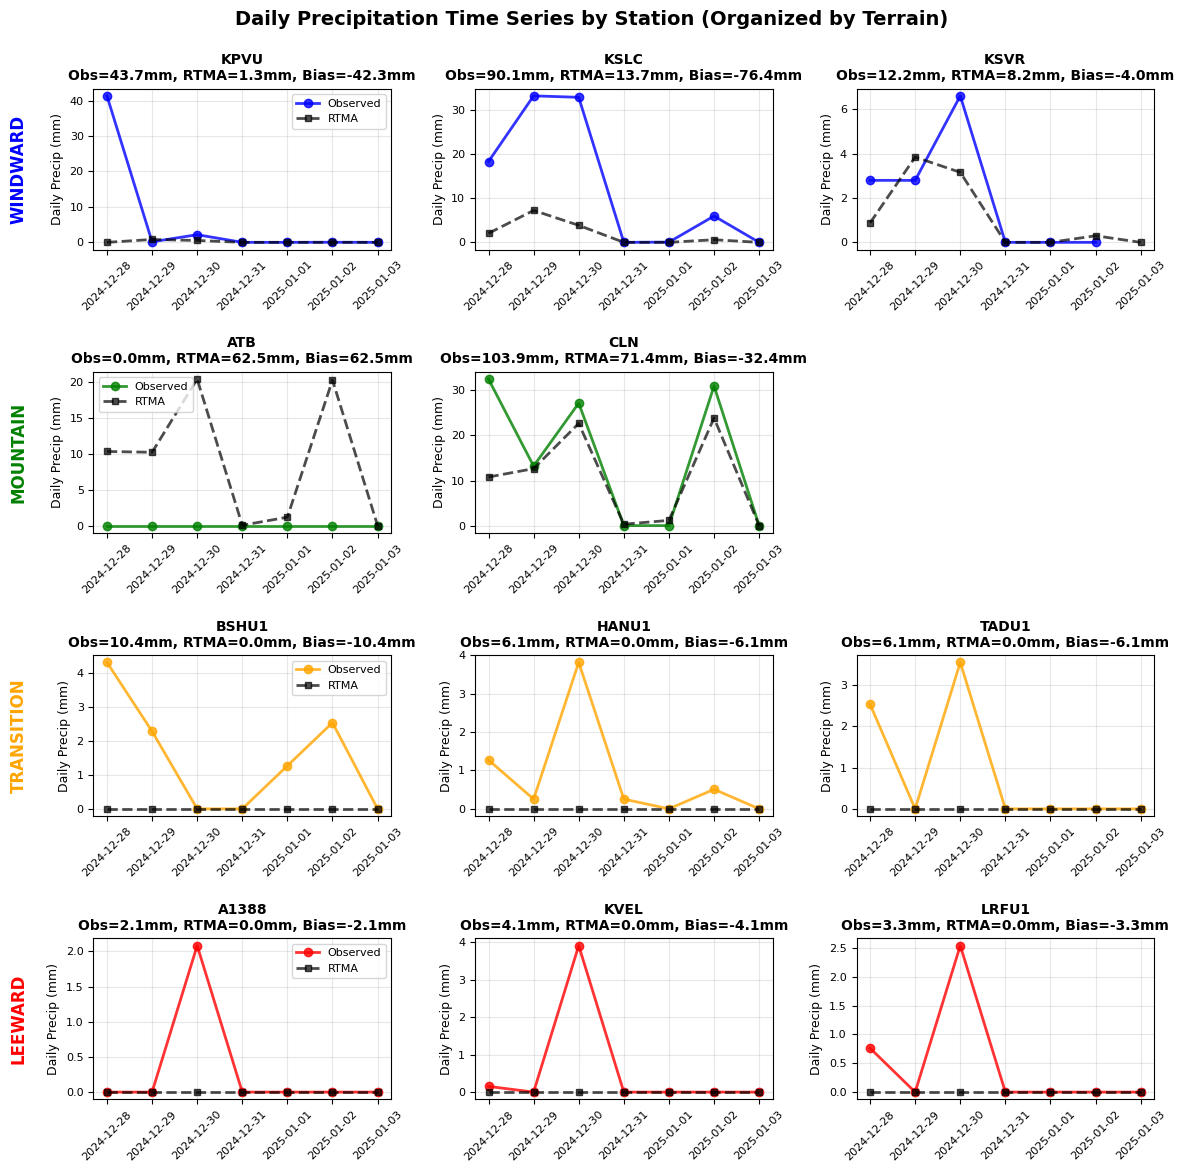

In [39]:
from datetime import datetime, timedelta
from synoptic.services import TimeSeries
import polars as pl
import matplotlib.pyplot as plt
from herbie import Herbie
import numpy as np
import os

TERRAIN_STATIONS = {
    'windward': {
        'KSLC': (40.77069, -111.96503),
        'KPVU': (40.22390, -111.72530),
        'KSVR': (40.61960, -111.99016)
    },
    'mountain': {
        'CLN': (40.5763, -111.6383),
        'ATB': (40.589, -111.637),
        'SPC': (40.641, -111.636)
    },
    'transition': {
        'HANU1': (40.40056, -110.75861),
        'BSHU1': (40.50694, -110.58833),
        'TADU1': (40.29972, -110.60417)
    },
    'leeward': {
        'LRFU1': (40.19190, -110.38099),
        'A1388': (40.28, -110.05),
        'KVEL': (40.44295, -109.51273)
    }
}


def get_terrain_precip_data(start_date: str, end_date: str):
    """Get daily precipitation totals by terrain type from observations.

    Args:
        start_date: Start date in format "YYYY-MM-DD"
        end_date: End date in format "YYYY-MM-DD"

    Returns:
        Dict of Polars DataFrames with daily precipitation by terrain type
    """
    results = {}

    # Loop through each terrain type
    for terrain_type, stations in TERRAIN_STATIONS.items():
        print(f"Processing {terrain_type} terrain...")

        # Combine station IDs into comma-separated string
        station_ids = ",".join(stations.keys())
        print(f"  Stations: {station_ids}")

        try:
            # Make the TimeSeries API call
            ts = TimeSeries(
                stid=station_ids,
                start=start_date,
                end=end_date,
                vars="precip_accum_one_hour",
                token=""
            )

            # Get the Polars dataframe directly
            df = ts.df()
            print(f"  Retrieved {len(df)} rows")

            # Aggregate to daily totals (UTC timezone)
            daily_df = (df
                        .with_columns([
                pl.col("date_time").dt.date().alias("date")
            ])
                        .group_by(["date", "stid"])
                        .agg([
                pl.col("value").sum().alias("daily_precip_mm"),
                pl.col("latitude").first(),
                pl.col("longitude").first(),
                pl.col("name").first(),
                pl.col("elevation").first()
            ])
                        .sort(["date", "stid"])
                        )

            print(f"  Daily aggregated: {len(daily_df)} rows")
            results[terrain_type] = daily_df

        except Exception as e:
            print(f"  Error getting data for {terrain_type}: {e}")
            results[terrain_type] = None

    return results


def get_rtma_precip_data(start_date: str, end_date: str):
    """Get daily RTMA precipitation totals by terrain type.

    Args:
        start_date: Start date in format "YYYY-MM-DD"
        end_date: End date in format "YYYY-MM-DD"

    Returns:
        Dict of Polars DataFrames with daily RTMA precipitation by terrain type
    """

    results = {}

    # Convert date strings to datetime objects
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")

    print(f"Getting RTMA data from {start_date} to {end_date}")

    # Generate list of all hours in the date range
    current_time = start
    all_times = []
    while current_time <= end:
        all_times.append(current_time)
        current_time += timedelta(hours=1)

    print(f"Processing {len(all_times)} hours...")

    # Process each terrain type
    for terrain_type, stations in TERRAIN_STATIONS.items():
        print(f"\nProcessing {terrain_type} terrain...")

        # Collect all hourly data for this terrain type
        hourly_data = []

        for current_time in all_times:
            time_str = current_time.strftime("%Y-%m-%d %H:%M")

            try:
                # Get RTMA data for this hour
                H = Herbie(time_str, model="rtma", product="pcp", fxx=0)
                file_path = H.download()

                # Load the dataset
                precip_result = H.xarray()

                # Find precipitation variable
                precip_ds = None
                precip_var = None

                if isinstance(precip_result, list):
                    for ds in precip_result:
                        for var in ds.data_vars:
                            if var in ['tp', 'APCP']:
                                precip_ds = ds
                                precip_var = var
                                break
                        if precip_ds is not None:
                            break
                else:
                    precip_ds = precip_result
                    for var in precip_ds.data_vars:
                        if var in ['tp', 'APCP']:
                            precip_var = var
                            break
                    if precip_var is None and len(precip_ds.data_vars) > 0:
                        precip_var = list(precip_ds.data_vars)[0]

                if precip_ds is None or precip_var is None:
                    print(f"  No precip data for {time_str}")
                    continue

                # Convert longitude from 0-360 to -180-180 if needed
                if precip_ds.longitude.min() > 180:
                    precip_ds = precip_ds.assign_coords(
                        longitude=(((precip_ds.longitude + 180) % 360) - 180)
                    )

                # Extract at each station location
                for station_id, (station_lat, station_lon) in stations.items():
                    # Find nearest grid point
                    lat_grid = precip_ds.latitude.values
                    lon_grid = precip_ds.longitude.values

                    # Calculate distances accounting for longitude convergence
                    distances = np.sqrt(
                        (lat_grid - station_lat) ** 2 +
                        ((lon_grid - station_lon) * np.cos(np.radians(station_lat))) ** 2
                    )

                    # Find the indices of minimum distance
                    min_idx = np.unravel_index(np.argmin(distances), distances.shape)

                    # Extract precipitation value
                    precip_value = float(precip_ds[precip_var].isel(y=min_idx[0], x=min_idx[1]).values)

                    # Store the data
                    hourly_data.append({
                        'stid': station_id,
                        'date_time': current_time,
                        'precip_mm': precip_value,
                        'latitude': station_lat,
                        'longitude': station_lon,
                        'name': f'RTMA_{station_id}',
                        'elevation': 0.0  # RTMA doesn't have elevation info
                    })

                if len(all_times) > 10:  # Only print progress for longer periods
                    if current_time.hour == 0:
                        print(f"  Completed {current_time.strftime('%Y-%m-%d')}")

            except Exception as e:
                print(f"  Error for {time_str}: {e}")
                continue

        # Convert to Polars DataFrame and aggregate to daily
        if hourly_data:
            hourly_df = pl.DataFrame(hourly_data)

            # Aggregate to daily totals
            daily_df = (hourly_df
                        .with_columns([
                pl.col("date_time").dt.date().alias("date")
            ])
                        .group_by(["date", "stid"])
                        .agg([
                pl.col("precip_mm").sum().alias("daily_precip_mm"),
                pl.col("latitude").first(),
                pl.col("longitude").first(),
                pl.col("name").first(),
                pl.col("elevation").first()
            ])
                        .sort(["date", "stid"])
                        )

            print(f"  RTMA aggregated: {len(daily_df)} daily records")
            results[terrain_type] = daily_df
        else:
            print(f"  No RTMA data for {terrain_type}")
            results[terrain_type] = None

    return results


def create_station_time_series_plots(obs_data, rtma_data, output_dir="./plots"):
    """Create individual time series plots for each station, organized by terrain type."""

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Terrain colors for consistency
    terrain_colors = {
        'windward': 'blue',
        'mountain': 'green',
        'transition': 'orange',
        'leeward': 'red'
    }

    # Collect stations organized by terrain
    stations_by_terrain = {}
    for terrain in TERRAIN_STATIONS.keys():
        stations_by_terrain[terrain] = []
        if obs_data[terrain] is not None:
            stations_in_terrain = obs_data[terrain]['stid'].unique().to_list()
            stations_by_terrain[terrain] = sorted(stations_in_terrain)

    # Calculate total number of stations and layout
    total_stations = sum(len(stations) for stations in stations_by_terrain.values())

    # Organize by terrain rows - each terrain gets its own row
    n_rows = len([t for t in TERRAIN_STATIONS.keys() if len(stations_by_terrain[t]) > 0])
    max_stations_per_terrain = max(len(stations) for stations in stations_by_terrain.values())
    n_cols = max_stations_per_terrain

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), squeeze=False)

    terrain_row = 0

    # Plot each terrain type in its own row
    for terrain in ['windward', 'mountain', 'transition', 'leeward']:
        if len(stations_by_terrain[terrain]) == 0:
            continue

        stations = stations_by_terrain[terrain]

        for col, station in enumerate(stations):
            ax = axes[terrain_row, col]

            # Get data for this station
            station_obs_data = None
            station_rtma_data = None

            if obs_data[terrain] is not None:
                station_obs_data = obs_data[terrain].filter(pl.col('stid') == station)

            if rtma_data[terrain] is not None:
                station_rtma_data = rtma_data[terrain].filter(pl.col('stid') == station)

            if station_obs_data is not None and station_rtma_data is not None and len(station_obs_data) > 0 and len(
                    station_rtma_data) > 0:
                # Convert to pandas for plotting
                obs_pd = station_obs_data.to_pandas()
                rtma_pd = station_rtma_data.to_pandas()

                # Plot observed data
                ax.plot(obs_pd['date'], obs_pd['daily_precip_mm'],
                        'o-', color=terrain_colors[terrain],
                        label='Observed', alpha=0.8, markersize=6, linewidth=2)

                # Plot RTMA data
                ax.plot(rtma_pd['date'], rtma_pd['daily_precip_mm'],
                        's--', color='black', label='RTMA',
                        alpha=0.7, markersize=5, linewidth=2)

                # Calculate some basic stats for the title
                obs_total = obs_pd['daily_precip_mm'].sum()
                rtma_total = rtma_pd['daily_precip_mm'].sum()
                bias = rtma_total - obs_total

                ax.set_title(f'{station}\nObs={obs_total:.1f}mm, RTMA={rtma_total:.1f}mm, Bias={bias:.1f}mm',
                             fontsize=10, fontweight='bold')
            else:
                ax.set_title(f'{station}\nNo Data Available', fontsize=10)

            ax.set_ylabel('Daily Precip (mm)', fontsize=9)
            ax.grid(True, alpha=0.3)
            ax.tick_params(axis='x', rotation=45, labelsize=8)
            ax.tick_params(axis='y', labelsize=8)

            # Add legend to first plot of each row
            if col == 0:
                ax.legend(fontsize=8)

        # Hide unused columns in this row
        for col in range(len(stations), n_cols):
            axes[terrain_row, col].set_visible(False)

        # Add terrain label on the left
        axes[terrain_row, 0].text(-0.25, 0.5, f'{terrain.upper()}',
                                  transform=axes[terrain_row, 0].transAxes,
                                  rotation=90, va='center', ha='center',
                                  fontsize=12, fontweight='bold',
                                  color=terrain_colors[terrain])

        terrain_row += 1

    plt.suptitle('Daily Precipitation Time Series by Station (Organized by Terrain)', fontsize=14, fontweight='bold')
    plt.tight_layout()

    # Save the plot
    output_file = os.path.join(output_dir, "station_time_series_by_terrain.png")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Station time series plot saved: {output_file}")

    return fig, output_file


# Example usage
if __name__ == "__main__":
    # Get observational data
    print("=== GETTING OBSERVATIONAL DATA ===")
    obs_data = get_terrain_precip_data("2024-12-28", "2025-01-03")

    print("\n=== GETTING RTMA DATA ===")
    rtma_data = get_rtma_precip_data("2024-12-28", "2025-01-03")

    print("\n=== COMPARISON RESULTS ===")
    for terrain in TERRAIN_STATIONS.keys():
        print(f"\n{terrain.upper()} terrain:")

        if obs_data[terrain] is not None:
            print(f"  Observations: {len(obs_data[terrain])} daily records")
            print(obs_data[terrain])
        else:
            print("  Observations: No data")

        if rtma_data[terrain] is not None:
            print(f"  RTMA: {len(rtma_data[terrain])} daily records")
            print(rtma_data[terrain])
        else:
            print("  RTMA: No data")

    # Create time series plots
    print("\n=== CREATING TIME SERIES PLOTS ===")
    fig, output_file = create_station_time_series_plots(obs_data, rtma_data)
    plt.show()